# Week 5 Hand-in

## Class exercise 1


In [1]:
%pylab inline 
import pandas as pd
import numpy as np

data = np.array([['','Col1','Col2','col3'],['Row1',1,2,3],['Row2',4,5,6],['Row3',7,8,9]])

df = pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])

#print('1', df['Col2'])
print('2', df.iloc[:, 2])
#print('3', df.iloc[2, 1])
#print('4', df.head())




Populating the interactive namespace from numpy and matplotlib
2 Row1    3
Row2    6
Row3    9
Name: col3, dtype: object


## Load Data 2008

In [2]:
# DF for all danes Married & Divorced 2008
df2008 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=1%2C2&ALDER=*&CIVILSTAND=G%2CF&Tid=2008K1',sep=';')
# SUB-DF totals for all danes Married & Divorced 2008
sub_df2008_total_country_and_gender = df2008.loc[(df2008['ALDER']=='I alt') & (df2008['OMRÅDE']=='Hele landet')]

#df2008.head()
#df2008.columns
#type(df2008)
#df2008.shape
#print(set(df2008['ALDER']))


## Load Data 2020


In [3]:
# DF for all danes Married & Divorced 2020
df2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=1%2C2&ALDER=*&CIVILSTAND=G%2CF&Tid=2020K4',sep=';')

# SUB-DF totals for all danes Married & Divorced 2020
sub_df2020_total_country_and_gender = df2020.loc[(df2020['ALDER']=='I alt') & (df2020['OMRÅDE']=='Hele landet')]
df2020.head()

,OMRÅDE,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Hele landet,Mænd,I alt,Gift/separeret,2020K4,1072984
1,Hele landet,Mænd,I alt,Fraskilt,2020K4,239684
2,Hele landet,Mænd,0 år,Gift/separeret,2020K4,0
3,Hele landet,Mænd,0 år,Fraskilt,2020K4,0
4,Hele landet,Mænd,1 år,Gift/separeret,2020K4,0


## Exercise 5.A.


Divorced percentage change 2008 to 2020: 22 %
Married percentage change 2008 to 2020: -2 %
Divorced in 2008: 428864
Married in 2008: 2176977
Divorced in 2020: 552419
Married in 2020: 2138124


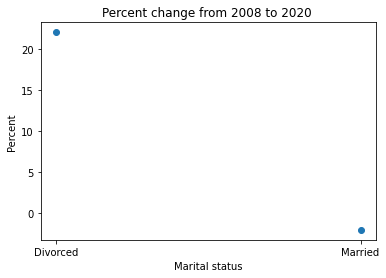

In [4]:
import matplotlib.pyplot as plt

def civilstand_total(sub_df :df, status :str):
    values = {}
    civilstand = sub_df.loc[sub_df['CIVILSTAND'] == status]
    sum = civilstand['INDHOLD'].sum()
    
    return sum

divorced_2008 = civilstand_total(sub_df2008_total_country_and_gender, 'Fraskilt')
married_2008 = civilstand_total(sub_df2008_total_country_and_gender, 'Gift/separeret')

divorced_2020 = civilstand_total(sub_df2020_total_country_and_gender, 'Fraskilt')
married_2020 = civilstand_total(sub_df2020_total_country_and_gender, 'Gift/separeret')

def percent_change():
    divorced = math.floor(((divorced_2020-divorced_2008)/divorced_2020)*100)
    married = math.floor(((married_2020-married_2008)/married_2020)*100)
    print('Divorced percentage change 2008 to 2020:', divorced, '%')
    print('Married percentage change 2008 to 2020:', married, '%')
    xpoints = (['Divorced', 'Married'])
    ypoints = ([divorced, married])
    plt.plot(xpoints, ypoints, 'o')
plt.xlabel("Marital status")
plt.ylabel("Percent")
plt.title("Percent change from 2008 to 2020 ")
percent_change()

print('Divorced in 2008:', divorced_2008)
print('Married in 2008:', married_2008)
print('Divorced in 2020:', divorced_2020)
print('Married in 2020:', married_2020)



## Exercise 5.B.
### Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?


Populating the interactive namespace from numpy and matplotlib


{'København': 65, 'Aarhus': 59, 'Aalborg': 54, 'Odense': 55, 'Vejle': 47}

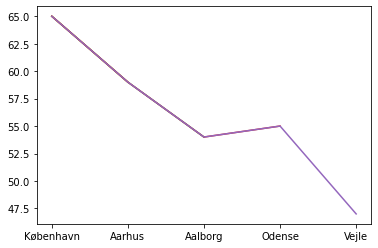

In [31]:
%pylab inline 
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df2020_5_2 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=*&Tid=2020K4', sep=';')
# Subset based on City_only and totals
df2020_city_totals = df2020_5_2.loc[(df2020_5_2['OMRÅDE']!='Hele landet') & (~df2020_5_2['OMRÅDE'].str.contains('Region')) & (df2020_5_2['CIVILSTAND'] == 'I alt')]
# Subset City_only totals sorted with top5 biggest cities
df2020_city_totals_top5_sorted = df2020_city_totals.sort_values('INDHOLD', ascending=False).iloc[:5,:]

city_series_sliced = list(df2020_city_totals_top5_sorted.loc[:, 'OMRÅDE'])

def calculate_percentage_never_married(cities:list):
    city_ugift_percent = {}
    for n in cities:  
        x = "'%s'" % n
        df2020_top5_cities_ugift_totals = df2020_5_2.loc[(df2020_5_2['OMRÅDE'] == n) & (df2020_5_2['CIVILSTAND'] == 'Ugift')]
        df2020_top5_cities_totals = df2020_5_2.loc[(df2020_5_2['OMRÅDE'] == n) & (df2020_5_2['CIVILSTAND'] == 'I alt')] 
        sum_ugift = df2020_top5_cities_ugift_totals.iloc[0, 5]
        sum_total = df2020_top5_cities_totals.iloc[0, 5]
        percent_never_married = math.floor((sum_ugift/sum_total)*100)
        city_ugift_percent.setdefault(n, percent_never_married)       
        plt.plot(list(city_ugift_percent.keys()), list(city_ugift_percent.values())) 
    return city_ugift_percent
calculate_percentage_never_married(city_series_sliced)

## Exercise 5.C.
### Show a bar chart of changes in marrital status in Copenhagen from 2008 till now


dftest,2008,2009,2020
Ugift,0.291836,0.368426,0.550469
Gift,0.783936,0.746300,0.806110
Fraskilt,0.948655,0.308840,0.495198


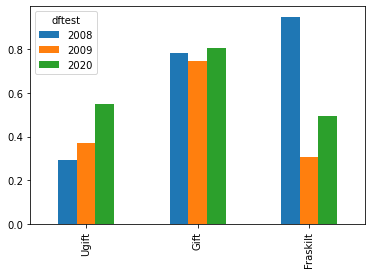

In [53]:
dftest = pd.DataFrame(np.random.rand(3, 3),
     index=['Ugift', 'Gift', 'Fraskilt'],
     columns=pd.Index(['2008', '2009', '2020'], name='dftest'))
dftest.plot.bar()
dftest

In [49]:
df2008_2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=F%2CE%2CG%2CU&Tid=*', sep=';')
df2008_2020.head()
print(df2008_2020)


        OMRÅDE    KØN  ALDER CIVILSTAND     TID  INDHOLD
0    København  I alt  I alt   Fraskilt  2008K1    50089
1    København  I alt  I alt   Fraskilt  2008K2    50160
2    København  I alt  I alt   Fraskilt  2008K3    50024
3    København  I alt  I alt   Fraskilt  2008K4    49836
4    København  I alt  I alt   Fraskilt  2009K1    49853
..         ...    ...    ...        ...     ...      ...
215  København  I alt  I alt      Ugift  2020K3   414218
216  København  I alt  I alt      Ugift  2020K4   417782
217  København  I alt  I alt      Ugift  2021K1   418133
218  København  I alt  I alt      Ugift  2021K2   419742
219  København  I alt  I alt      Ugift  2021K3   419966

[220 rows x 6 columns]


dftest,2008,2009,2020
Ugift,0.172995,0.404663,0.802846
Gift,0.020769,0.490111,0.728343
Fraskilt,0.352347,0.118204,0.197836


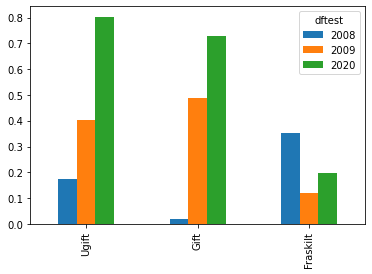

In [83]:
dftest = pd.DataFrame(np.random.rand(3, 3),
     index=['Ugift', 'Gift', 'Fraskilt'],
     columns=pd.Index(['2008', '2009', '2020'], name='dftest'))
dftest.plot.bar()
dftest

In [103]:
df2008_2020_slice = df2008_2020.iloc[:,3:]
indexed = df2008_2020_slice.set_index('CIVILSTAND')
indexed.head()
#time = list(indexed['TID'])



,TID,INDHOLD
CIVILSTAND,,
Fraskilt,2008K1,50089
Fraskilt,2008K2,50160
Fraskilt,2008K3,50024
Fraskilt,2008K4,49836
Fraskilt,2009K1,49853
